[2018-01-03 21:48:05,769] Making new env: MountainCarContinuous-v0


Sample Action: 
[-0.1526904]
Sample Shape
(1,)
state_dim: 2
action_dim: 1
action_bound: [ 1.]
[2, 400]
0
elem_1 [2, 400]
elem_2 [2, 400]
1
elem_1 [400]
elem_2 [400]
2
elem_1 [400, 300]
elem_2 [400, 300]
3
elem_1 [300]
elem_2 [300]
4
elem_1 [300, 1]
elem_2 [300, 1]
5
elem_1 [1]
elem_2 [1]
act_nn shape Tensor("Mul_92:0", shape=(1,), dtype=float32)
target_nn shape Tensor("Mul_93:0", shape=(1,), dtype=float32)
Sum shape [1]
length 6
yes


[2018-01-03 21:48:07,690] Clearing 8 monitor files from previous run (because force=True was provided)
[2018-01-03 21:48:10,720] Starting new video recorder writing to /Users/silvia/Documents/Courses/2017/591/DeepLearningProject-master/DDPG Codes/results/biped_restart_8/gym_ddpg/openaigym.video.2.35729.video000000.mp4


Training
| Reward: 72  | Episode 0 | Qmax: 0.0069
Training
| Reward: -84  | Episode 1 | Qmax: 4.1675
Training
| Reward: -116  | Episode 2 | Qmax: 3.8956
Training
| Reward: -144  | Episode 3 | Qmax: 4.4155
Training
| Reward: -122  | Episode 4 | Qmax: 4.3722
Training
| Reward: -86  | Episode 5 | Qmax: 4.7795
Training
| Reward: -64  | Episode 6 | Qmax: 5.1295
Training
| Reward: 79  | Episode 7 | Qmax: 4.8088
Training
| Reward: -73  | Episode 8 | Qmax: 8.0636
Training
| Reward: 82  | Episode 9 | Qmax: 6.8892
Training
| Reward: 59  | Episode 10 | Qmax: 10.8658
Training
| Reward: 51  | Episode 11 | Qmax: 9.5662
Training
| Reward: 41  | Episode 12 | Qmax: 16.3323
Training
| Reward: 77  | Episode 13 | Qmax: 20.2023
Training
| Reward: 33  | Episode 14 | Qmax: 21.4529
Training
| Reward: 72  | Episode 15 | Qmax: 21.5046
Training
| Reward: 23  | Episode 16 | Qmax: 27.4534
Training
| Reward: 84  | Episode 17 | Qmax: 34.7537
Training
| Reward: 72  | Episode 18 | Qmax: 36.0109
Training
| Reward: 83  

[2018-01-03 21:55:42,233] Starting new video recorder writing to /Users/silvia/Documents/Courses/2017/591/DeepLearningProject-master/DDPG Codes/results/biped_restart_8/gym_ddpg/openaigym.video.2.35729.video000049.mp4


Training
| Reward: 80  | Episode 48 | Qmax: 82.6488
Testing
| Reward: -29  | Episode 49 | Qmax: 0.0000
Training
| Reward: 81  | Episode 50 | Qmax: 85.0471
Training
| Reward: -20  | Episode 51 | Qmax: 84.6806
Training
| Reward: 42  | Episode 52 | Qmax: 85.3970
Training
| Reward: 56  | Episode 53 | Qmax: 84.7783
Training
| Reward: 45  | Episode 54 | Qmax: 84.8171
Training
| Reward: 46  | Episode 55 | Qmax: 85.8313
Training
| Reward: 56  | Episode 56 | Qmax: 83.4193
Training
| Reward: 68  | Episode 57 | Qmax: 84.9121
Training
| Reward: 44  | Episode 58 | Qmax: 85.4683
Training
| Reward: 40  | Episode 59 | Qmax: 83.2130
Training
| Reward: 51  | Episode 60 | Qmax: 85.8628
Training
| Reward: 31  | Episode 61 | Qmax: 86.5400
Training
| Reward: 53  | Episode 62 | Qmax: 84.5097
Training
| Reward: -10  | Episode 63 | Qmax: 86.0478
Training
| Reward: 53  | Episode 64 | Qmax: 87.9048
Training
| Reward: -148  | Episode 65 | Qmax: 86.6557
Training
| Reward: 45  | Episode 66 | Qmax: 84.2327
Training


[2018-01-03 22:01:54,834] Starting new video recorder writing to /Users/silvia/Documents/Courses/2017/591/DeepLearningProject-master/DDPG Codes/results/biped_restart_8/gym_ddpg/openaigym.video.2.35729.video000098.mp4


Training
| Reward: 82  | Episode 97 | Qmax: 85.8457
Training
| Reward: 71  | Episode 98 | Qmax: 89.2937
Testing
| Reward: -88  | Episode 99 | Qmax: 0.0000


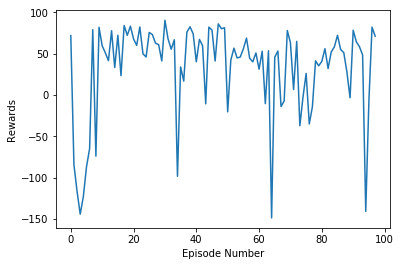

[2018-01-03 22:02:01,205] Finished writing results. You can upload them to the scoreboard via gym.upload('/Users/silvia/Documents/Courses/2017/591/DeepLearningProject-master/DDPG Codes/results/biped_restart_8/gym_ddpg')


In [3]:
"""
The below script implements an agent that learns using the Deep Deterministic Policy Gradient algorithm.  The script
uses four classes: random noise generator, replay buffer, and actor and critic network classes.  After defining these
classes, the main loop runs the two-step learning cycle in which the agent (i) experiments with new actions and
evaluates them and then (ii) improves behavior based on the success of the experimentation.

The script is currently set to create a Mountain Car agent. 
"""

import tensorflow as tf
import numpy as np
import pickle

# Import random noise generator class
from DDPG_Noise import OUNoise

# Import Replay Buffer class and deque data structure
import random
from memory import ReplayBuffer

# Import Actor and Critic network classes
from Actor import ActorNetwork
from Critic import CriticNetwork


#Import OpenAI gym
import gym
from gym import wrappers

import matplotlib.pyplot as plt
import math

        
# Learning Parameters

# Restore Variable used to load weights
RESTORE = False

# Number of episodes to be run
MAX_EPISODES = 100

# Max number of steps in each episode
MAX_EP_STEPS = 100000


# Learning rates
ACTOR_LEARNING_RATE = 0.01
CRITIC_LEARNING_RATE = 0.0005

# Size of replay buffer reflect how many transitions can be stored at once
BUFFER_SIZE = 10000
# Minibatch size is the number of transitions that are used to update the Q and policy functions
MINIBATCH_SIZE = 64

# Actor/Critical Neural Network Architecture
LAYER_1_SIZE = 400
LAYER_2_SIZE = 300

# Discount factor reflects the agents preference for short-term rewards over long-term rewards
GAMMA = 0.99

# Tau reflects how quickly target networks should be updated
TAU = 0.001

# Environment Variables

# Environment Name
#ENV_NAME = 'BipedalWalker-v2'
ENV_NAME = 'MountainCarContinuous-v0'
# Result storage locations
MONITOR_DIR = './results/biped_restart_8/gym_ddpg'
SUMMARY_DIR = './results/biped_restart_8/tf_ddpg'
RANDOM_SEED = 25


# The train function implements the two-step learning cycle.
def train(sess, env, actor, critic,RESTORE):
    
    sess.run(tf.global_variables_initializer())
    
    # Initialize random noise generator
    exploration_noise = OUNoise(env.action_space.shape[0])
    
    # Initialize target network weights
    actor.update_target_network()
    critic.update_target_network()

    # Initialize replay buffER
    replay_buffer = ReplayBuffer(BUFFER_SIZE, RANDOM_SEED)

    
    # Store q values for illustration purposes
    q_max_array = []
    rewards_save = []
    
    
    for i in range(MAX_EPISODES):

        s = env.reset()

        ep_reward = 0
        ep_ave_max_q = 0
        

        for j in range(MAX_EP_STEPS):

            env.render()

            # Begin "Experimentation and Evaluation Phase"
            
            # Seleect next experimental action by adding noise to action prescribed by policy 
            a = actor.predict(np.reshape(s, (1, actor.s_dim)))
            
            
            # If in a testing episode, do not add noise
            if i%100 is not 49 and i%100 is not 99:
                noise = exploration_noise.noise()
                a = a + noise


            # Take step with experimental action
            s2, r, terminal, info = env.step(np.reshape(a.T,newshape=(env.action_space.shape[0],)))

            # Add transition to replay buffer if not testing episode
            if i%100 is not 49 and i%100 is not 99:
                replay_buffer.add(np.reshape(s, (actor.s_dim,)), np.reshape(a, (actor.a_dim,)), r,
                                  terminal, np.reshape(s2, (actor.s_dim,)))

                # Keep adding experience to the memory until
                # there are at least minibatch size samples
                if replay_buffer.size() > MINIBATCH_SIZE:
                    s_batch, a_batch, r_batch, t_batch, s2_batch = replay_buffer.sample_batch(MINIBATCH_SIZE)

                    # Find target estimate to use for updating the Q-function
                    
                    # Predict_traget function determines Q-value of next state
                    target_q = critic.predict_target(s2_batch, actor.predict_target(s2_batch))

                    # Complete target estimate (R(t+1) + Q(s(t+1),a(t+1)))
                    y_i = []
                    for k in range(MINIBATCH_SIZE):
                        if t_batch[k]:
                            y_i.append(r_batch[k])
                        else:
                            y_i.append(r_batch[k] + GAMMA * target_q[k])

                    # Perform gradient descent to update critic
                    predicted_q_value, _ = critic.train(s_batch, a_batch, np.reshape(y_i, (MINIBATCH_SIZE, 1)))


                    ep_ave_max_q += np.amax(predicted_q_value, axis = 0)

                    # Perform "Learning" phase by moving policy parameters in direction of deterministic policy gradient
                    a_outs = actor.predict(s_batch)
                    grads = critic.action_gradients(s_batch, a_outs)
                    actor.train(s_batch, grads[0])

                    # Update target networks
                    actor.update_target_network()
                    critic.update_target_network()

            s = s2
            ep_reward += r

            # If episode is finished, print results
            if terminal:
                
                if i%100 is 49 or i%100 is 99:
                    print("Testing")
                    print ('| Reward: %.2i' % int(ep_reward), " | Episode", i, '| Qmax: %.4f' % (ep_ave_max_q / float(j)))
                else:
                    print("Training")
                    print ('| Reward: %.2i' % int(ep_reward), " | Episode", i, '| Qmax: %.4f' % (ep_ave_max_q / float(j)))
                    q_max_array.append(ep_ave_max_q / float(j))
                    rewards_save.append(ep_reward)
                    pickle.dump(q_max_array,open('q_max_mountain_car_100episodes_critic_lr0_0005_actor_lr0_01.p','wb'))
                    pickle.dump(rewards_save,open('rewards_mountain_car_100episodes_critic_lr0_0005_actor_lr0_01.p','wb'))
                break
    fig = plt.figure()
    plt.plot(rewards_save)
    plt.xlabel('Episode Number')
    plt.ylabel('Rewards')
    plt.show()
    fig.savefig('Rewards_mountain car_100episodes_critic_lr0_0005_actor_lr0_01.jpg')
                
# Begin program                
def main():
    with tf.Session() as sess:

        env = gym.make(ENV_NAME)
        np.random.seed(RANDOM_SEED)
        tf.set_random_seed(RANDOM_SEED)
        env.seed(RANDOM_SEED)

        # Check environment dimensions
        state_dim = env.observation_space.shape[0]
        action_dim = env.action_space.shape[0]
        action_bound = env.action_space.high
        print("Sample Action: ")
        print(env.action_space.sample())
        print("Sample Shape")
        print(np.shape(env.action_space.sample()))
        print("state_dim:", state_dim)
        print("action_dim:", action_dim)
        print("action_bound:", action_bound)
        # print("Valid Action")
        # val_act = np.array([[1.05],[0.5],[-1.3],[0.2]])
        # print(env.action_space.contains(val_act))
        # Ensure action bound is symmetric
        # assert (env.action_space.high == -env.action_space.low)

        
        # Build actor and critic networks
        actor = ActorNetwork(sess, state_dim, action_dim, action_bound,
                             ACTOR_LEARNING_RATE, TAU)
        print("yes")
        critic = CriticNetwork(sess, state_dim, action_dim,
                               CRITIC_LEARNING_RATE, TAU, actor.get_num_trainable_vars())
        
        

        
        # Film training videos if applicable
        env = wrappers.Monitor(env, MONITOR_DIR, force=True, video_callable=lambda episode_id: episode_id%49==0)
        

        train(sess, env, actor, critic,RESTORE)

            
main()



